# 20240530 筆記

## 作業

請使用 YOLO 根據 kaggle 上面的 traffic sign detection 資料集，建立一個自己的 model。

https://www.kaggle.com/datasets/pkdarabi/cardetection

## 從 image 裡面取得 foreground object

In [8]:
import cv2
import numpy as np
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [5]:
image = cv2.imread('metal100.jpg')

In [7]:
px.imshow(image[:,:,::-1])

In [9]:
# 建立 mask
mask = np.zeros(image.shape[:2], np.uint8)

# 定義模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 繪製矩形，包含前景對象
rect = (60, 10, 440, 350)

# 應用GrabCut算法
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 生成前景掩碼
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image * mask2[:, :, np.newaxis]

In [10]:
px.imshow(foreground[:,:,::-1])

In [11]:
import gradio as gr

In [12]:
def process(image, xmin, ymin, xmax, ymax):
    # 建立 mask
    mask = np.zeros(image.shape[:2], np.uint8)
    
    # 定義模型
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    
    # 繪製矩形，包含前景對象
    rect = (xmin, ymin, xmax, ymax)
    
    # 應用GrabCut算法
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    
    # 生成前景掩碼
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    foreground = image * mask2[:, :, np.newaxis]
    return foreground

In [13]:
gr.Interface(process,
             ["image", "number", "number", "number", "number"],
             "image").launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


## 使用 YOLOv8 的 Instance Segmentation

In [14]:
from ultralytics import YOLO

In [15]:
model = YOLO("yolov8n-seg.pt")

100%|█████████████████████████████████| 6.73M/6.73M [00:01<00:00, 7.01MB/s]


In [16]:
results = model('therock.jpg')


image 1/1 C:\Users\Victor\vcdemy\20240530\therock.jpg: 480x640 1 person, 1 tie, 1 chair, 686.0ms
Speed: 12.5ms preprocess, 686.0ms inference, 2036.8ms postprocess per image at shape (1, 3, 480, 640)


In [17]:
results[0].show()

## Instance Segmentation 只畫出 polygon 的形狀。


0: 480x640 1 person, 1 tie, 279.4ms
Speed: 14.5ms preprocess, 279.4ms inference, 8.5ms postprocess per image at shape (1, 3, 480, 640)


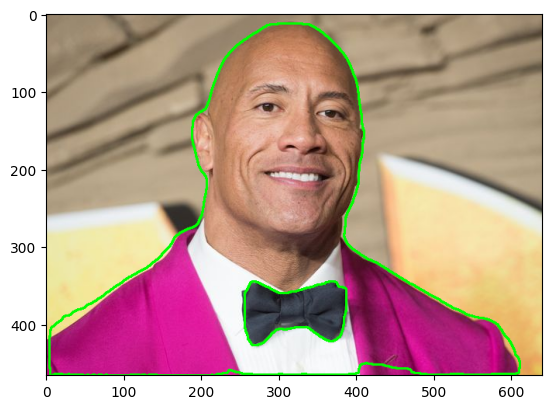

In [37]:
image = cv2.imread('therock.jpg')
image = image[:,:,::-1]
results = model(image)
image = image.astype(np.int32)
for result in results:
    for seg in result.masks.xy:  # 獲取分割多邊形
        # 轉換為整數類型座標
        points = np.array(seg, dtype=np.int32)
        # 繪製多邊形
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image)


0: 480x640 1 person, 1 tie, 1 chair, 240.4ms
Speed: 12.5ms preprocess, 240.4ms inference, 10.5ms postprocess per image at shape (1, 3, 480, 640)


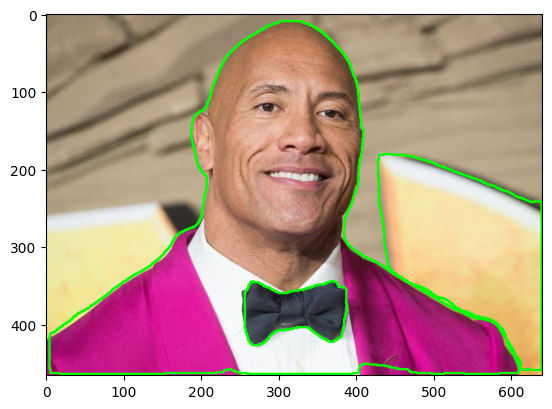

In [42]:
image = cv2.imread('therock.jpg')
results = model(image)
# image = image.astype(np.int32)
for result in results:
    for seg in result.masks.xy:  # 獲取分割多邊形
        # 轉換為整數類型座標
        points = np.array(seg, dtype=np.int32)
        # 繪製多邊形
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image[:,:,::-1])

In [52]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [48]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([27.,  0., 56.])
conf: tensor([0.9355, 0.8956, 0.2968])
data: tensor([[2.5242e+02, 3.4412e+02, 3.8907e+02, 4.2875e+02, 9.3555e-01, 2.7000e+01],
        [8.6670e-01, 5.8953e+00, 6.1786e+02, 4.6459e+02, 8.9562e-01, 0.0000e+00],
        [4.2681e+02, 1.7738e+02, 6.3929e+02, 4.5887e+02, 2.9677e-01, 5.6000e+01]])
id: None
is_track: False
orig_shape: (466, 640)
shape: torch.Size([3, 6])
xywh: tensor([[320.7437, 386.4384, 136.6449,  84.6313],
        [309.3615, 235.2449, 616.9895, 458.6992],
        [533.0496, 318.1231, 212.4879, 281.4846]])
xywhn: tensor([[0.5012, 0.8293, 0.2135, 0.1816],
        [0.4834, 0.5048, 0.9640, 0.9843],
        [0.8329, 0.6827, 0.3320, 0.6040]])
xyxy: tensor([[252.4212, 344.1227, 389.0662, 428.7540],
        [  0.8667,   5.8953, 617.8562, 464.5945],
        [426.8056, 177.3808, 639.2935, 458.8654]])
xyxyn: tensor([[0.3944, 0.7385, 0.6079, 0.9201],
        [0.0014, 0.0127, 0.9654, 0.9970],
        


0: 480x640 1 person, 1 tie, 1 chair, 295.5ms
Speed: 6.1ms preprocess, 295.5ms inference, 10.1ms postprocess per image at shape (1, 3, 480, 640)


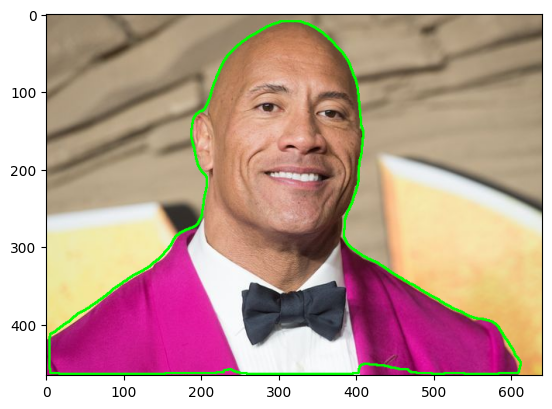

In [55]:
image = cv2.imread('therock.jpg')
results = model(image)
# image = image.astype(np.int32)
seg = results[0].masks.xy[1]  # 獲取分割多邊形
# 轉換為整數類型座標
points = np.array(seg, dtype=np.int32)
# 繪製多邊形
cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image[:,:,::-1])


0: 480x640 1 person, 1 tie, 1 chair, 408.3ms
Speed: 7.5ms preprocess, 408.3ms inference, 8.5ms postprocess per image at shape (1, 3, 480, 640)


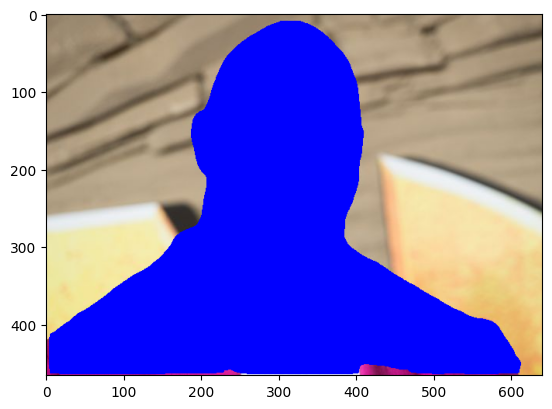

In [57]:
image = cv2.imread('therock.jpg')
results = model(image)
seg = results[0].masks.xy[1]  # 獲取分割多邊形
# 轉換為整數類型座標
points = np.array(seg, dtype=np.int32)
# 繪製多邊形
# cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
cv2.fillPoly(image, pts=[points], color=(255, 0, 0))
plt.imshow(image[:,:,::-1])

## 練習 01

請標出特定圖片上面的 Person 的形狀。

如：

https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/newscms/2019_32/2963871/190808-abbey-road-beatles-mc-1025.JPG

In [58]:
beetles = cv2.imread('beetles.webp')

In [59]:
results = model(beetles)


0: 352x640 5 persons, 7 cars, 285.0ms
Speed: 7.8ms preprocess, 285.0ms inference, 24.1ms postprocess per image at shape (1, 3, 352, 640)


In [60]:
results[0].show()

In [61]:
results[0].boxes.cls

tensor([0., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2.])

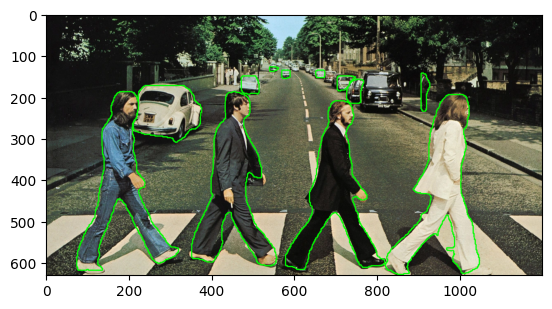

In [63]:
for seg in results[0].masks.xy:  # 獲取分割多邊形
    # 轉換為整數類型座標
    points = np.array(seg, dtype=np.int32)
    # 繪製多邊形
    cv2.polylines(beetles, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(beetles[:,:,::-1])


0: 352x640 5 persons, 7 cars, 226.3ms
Speed: 7.0ms preprocess, 226.3ms inference, 18.1ms postprocess per image at shape (1, 3, 352, 640)


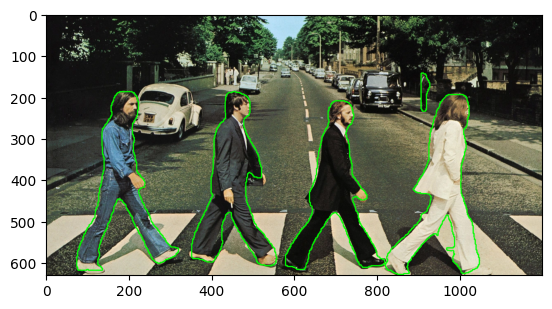

In [66]:
beetles = cv2.imread('beetles.webp')
results = model(beetles)
for i, seg in enumerate(results[0].masks.xy):  # 獲取分割多邊形
    if int(results[0].boxes.cls[i])==0:
        # 轉換為整數類型座標
        points = np.array(seg, dtype=np.int32)
        # 繪製多邊形
        cv2.polylines(beetles, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(beetles[:,:,::-1])

In [74]:
def process(image, cls='0'):
    results = model(image)
    for i, seg in enumerate(results[0].masks.xy):  # 獲取分割多邊形
        if int(results[0].boxes.cls[i])==int(cls):
            # 轉換為整數類型座標
            points = np.array(seg, dtype=np.int32)
            # 繪製多邊形
            cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

In [75]:
gr.Interface(process, ["image", "text"], "image").launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.



0: 384x640 4 persons, 2 cars, 2 trucks, 1090.9ms
Speed: 37.7ms preprocess, 1090.9ms inference, 52.4ms postprocess per image at shape (1, 3, 384, 640)


## 使用 Transfer Learning 做 MNIST 的分類

使用別人做好的 Feature Extraction 的部分 + 自己做的 Classification 的部分。

In [83]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 将图像转换为3通道（RGB）以匹配预训练模型的输入
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# 归一化图像
x_train = x_train / 255
x_test = x_test / 255

# 将标签转换为one-hot编码
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [84]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 加载预训练的MobileNetV2模型，不包含顶层
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 冻结预训练模型的层
for layer in base_model.layers:
    layer.trainable = False

# 添加自定义分类层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# 创建最终的模型
model = Model(inputs=base_model.input, outputs=predictions)


C:\Users\Victor\AppData\Local\Temp\ipykernel_27476\1659551361.py:6: UserWarning:

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.



In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 使用数据增强
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# 训练模型
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\Victor\miniconda3\envs\20240528\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 313s 161ms/step - accuracy: 0.5495 - loss: 1.3103 - val_accuracy: 0.6723 - val_loss: 0.9498
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 293s 156ms/step - accuracy: 0.6235 - loss: 1.0695 - val_accuracy: 0.6799 - val_loss: 0.9091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 287s 153ms/step - accuracy: 0.6403 - loss: 1.0215 - val_accuracy: 0.6853 - val_loss: 0.8858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 269s 143ms/step - accuracy: 0.6465 - loss: 1.0008 - val_accuracy: 0.6937 - val_loss: 0.8728
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 294s 128ms/step - accuracy: 0.6486 - loss: 0.9953 - val_accuracy: 0.7029 - val_loss: 0.8484
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 288s 153ms/step - accuracy: 0.6573 - loss: 0.9829 - val_accuracy: 0.6975 - val_loss: 0.8629
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 318s 151ms/step - accuracy: 0.6601 - loss: 0.9658 - val_accuracy: 0.7060 - val_loss: 0.8472
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 268s 143ms/step - accuracy: 0.6

## 使用 NN 做 MNIST 分類

Epoch 1/10


C:\Users\Victor\miniconda3\envs\20240528\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7937 - loss: 0.6995 - val_accuracy: 0.9229 - val_loss: 0.2701
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9166 - loss: 0.2776 - val_accuracy: 0.9274 - val_loss: 0.2368
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9255 - loss: 0.2444 - val_accuracy: 0.9212 - val_loss: 0.2609
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9259 - loss: 0.2454 - val_accuracy: 0.9311 - val_loss: 0.2324
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9347 - loss: 0.2159 - val_accuracy: 0.9416 - val_loss: 0.1927
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9381 - loss: 0.2007 - val_accuracy: 0.9447 - val_loss: 0.1852
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9422 - loss: 0.1901 - val_accuracy: 0.9426 - val_loss: 0.1883
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9455 - loss: 0.1724 - val_accurac

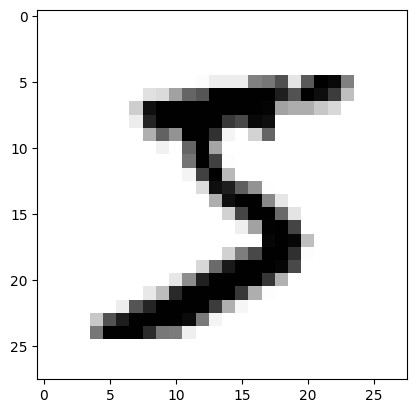

In [88]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap='gray_r')
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()

model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)
# train_history = model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)

## 使用 CNN 做 MNIST 的分類

In [92]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [91]:
x_train.shape

(60000, 28, 28)

In [93]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)

C:\Users\Victor\miniconda3\envs\20240528\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 65s 129ms/step - accuracy: 0.8242 - loss: 2.0604 - val_accuracy: 0.9705 - val_loss: 0.0929
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 81s 127ms/step - accuracy: 0.9818 - loss: 0.0579 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 61s 128ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9866 - val_loss: 0.0477
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 69s 100ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9848 - val_loss: 0.0549
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 53s 110ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9872 - val_loss: 0.0475
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.9938 - loss: 0.0181 - val_accuracy: 0.9862 - val_loss: 0.0553
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 46s 95ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9882 - val_loss: 0.0516
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 84s 99ms/step - accuracy: 0.9944 - loss: 0.0

In [110]:
model.save('cnn.keras')

## 測試一下我們的模型

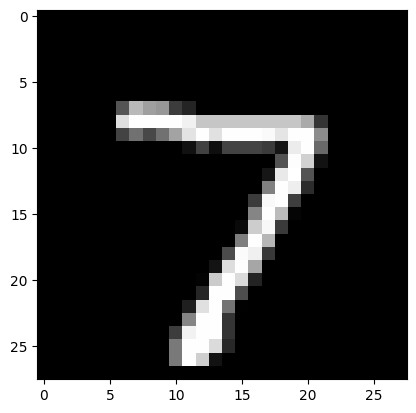

In [98]:
plt.imshow(x_test[0], cmap="gray")

In [104]:
model.predict(x_test[0].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


array([[ 1.4681e-12,  8.7745e-11,  9.4244e-08,  3.2409e-09,  1.6424e-12,  4.8797e-11,  7.7826e-15,           1,  1.3987e-12,  5.9497e-09]], dtype=float32)

In [108]:
np.argmax(model.predict(x_test[0].reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


7

In [153]:
def predict(image):
    # # return image['layers'][0].size
    # test = image['layers'][0].convert('L').thumbnail((28, 28))
    # test = np.array(test)
    # # return np.argmax(model.predict(test.reshape(1, 28, 28, 1)))
    image['composite'].convert('L').save('test.jpg')
    test = np.array(image['composite'].convert('L').resize((28, 28)))
    return np.argmax(model.predict(test.reshape(1, 28, 28, 1)))

In [154]:
gr.Interface(predict, gr.ImageEditor(type="pil", sources=None, layers=False), 'image').launch()

Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.
